In [1]:
# Require the packages
require(ggplot2)
library(repr)

options(repr.plot.width=10.5, repr.plot.height=4.5)

Loading required package: ggplot2


In [20]:
results_dir <- "../resources/results/results_semisupervised_semeval_7k/009"
lemma_data <- data.frame(iteration=integer(), sense=character(), count=integer(), experiment=character())

for(exp in c("bow_logreg", "wordvec_mlp_2_0", "wordvecpos_mlp_2_0")) {
    data <- read.csv(paste(results_dir, exp, "targets_distribution", sep="/"), header = F)
    names(data) <- c("iteration", "sense", "count")
    data$experiment <- exp
    lemma_data <- rbind(lemma_data, data)
}

lemma_data$experiment <- factor(lemma_data$experiment)
levels(lemma_data$experiment) <- c("Bag-of-Words &\nLogistic Regression",
                                  "Word Embeddings &\nMultilayer Perceptron",
                                  "Word Embeddings and PoS &\nMultilayer Perceptron")

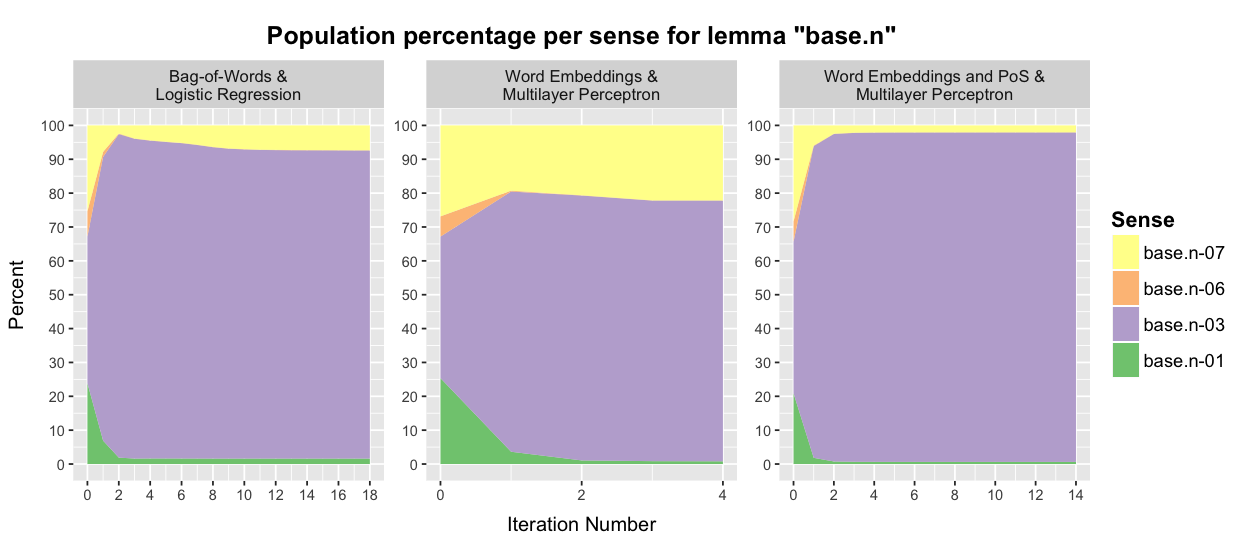

In [22]:
p <- ggplot(lemma_data, aes(x=iteration, y=count, fill=sense))
p <- p + facet_wrap(~ experiment, scales = 'free')
p <- p + geom_area(position="fill")
p <- p + scale_x_continuous(breaks=seq(0, 20, 2))
p <- p + scale_y_continuous(breaks=seq(0, 1, 0.1), labels=seq(0, 100, 10))
p <- p + labs(title="Population percentage per sense for lemma \"base.n\"", y="Percent", x="Iteration Number")
p <- p + scale_fill_brewer(name="Sense", palette = "Accent", direction = 1,
                          breaks=c("base.n-07", "base.n-06", "base.n-03", "base.n-01"))
p <- p + theme(
      plot.title=element_text(size=15, face="bold", margin=margin(10, 0, 10, 0), vjust=1, lineheight=0.6),
      strip.text.x=element_text(size=10),
      axis.title.x=element_text(size=12, margin=margin(10, 0, 0, 0)),
      axis.title.y=element_text(size=12, margin=margin(0, 10, 0, 0)),
      legend.title=element_text(face="bold", size=13),
      legend.text=element_text(size=11),
      legend.key.height=unit(1.5,"line")
  )
p4 <- p
p

In [ ]:
# Save the plot
ggsave("plots/dirigir.png", plot=p, width=10.5, height=4.5)

In [28]:
library(grid)
library(gridExtra)

In [34]:
options(repr.plot.width=10.5, repr.plot.height=18)
ggsave("plots/population_progres.png", plot=grid.arrange(p1, p2, p3, p4, ncol = 1), width=10.5, height=18)